In [7]:
#plotting the results from a test glm gwas with plink2
library(data.table)
library(qqman)


For example usage please run: vignette('qqman')

Citation appreciated but not required:
Turner, (2018). qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. Journal of Open Source Software, 3(25), 731, https://doi.org/10.21105/joss.00731.



In [23]:
glm_assoc <- fread("~/ClownfishGWAS/data/APPC_sequencing/DNA/filtering/imputation/plink_gwas/test_glm_with_covar_SL.PHENO1.glm.linear")[, 
        CHROM := gsub("CM", "", CHROM ,fixed = TRUE)][, 
        CHROM := gsub("PYAM", "", CHROM ,fixed = TRUE)][, 
        CHROM := gsub(".", "", CHROM ,fixed = TRUE)][,
        CHROM := as.numeric(CHROM)]

In [24]:
str(glm_assoc)

Classes ‘data.table’ and 'data.frame':	8700 obs. of  12 variables:
 $ CHROM : num  97081 97081 97081 97081 97081 ...
 $ POS   : int  36392 36392 36392 36392 36392 45974 45974 45974 45974 45974 ...
 $ ID    : chr  "CM009708.1:36392" "CM009708.1:36392" "CM009708.1:36392" "CM009708.1:36392" ...
 $ REF   : chr  "G" "G" "G" "G" ...
 $ ALT   : chr  "T" "T" "T" "T" ...
 $ A1    : chr  "T" "T" "T" "T" ...
 $ TEST  : chr  "ADD" "COVAR1" "COVAR2" "COVAR3" ...
 $ OBS_CT: int  124 124 124 124 124 125 125 125 125 125 ...
 $ BETA  : num  -0.0215 0.1651 0.1051 0.1194 -0.1977 ...
 $ SE    : num  0.0237 0.1537 0.1932 0.153 0.1834 ...
 $ T_STAT: num  -0.91 1.074 0.544 0.781 -1.078 ...
 $ P     : num  0.365 0.285 0.588 0.437 0.283 ...
 - attr(*, ".internal.selfref")=<externalptr> 


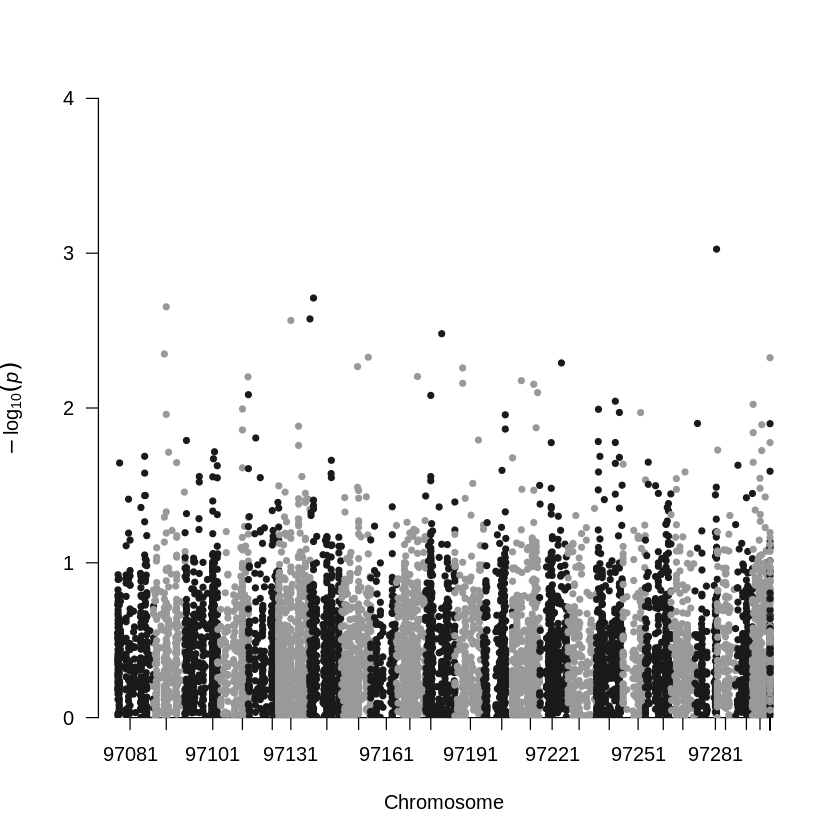

In [27]:
manhattan(glm_assoc, chr="CHROM", bp="POS", p="P", snp="ID", suggestiveline = -log10(1e-05))

In [32]:
head(glm_assoc)

CHROM,POS,ID,REF,ALT,A1,TEST,OBS_CT,BETA,SE,T_STAT,P
97081,36392,CM009708.1:36392,G,T,T,ADD,124,-0.02154810,0.0236829,-0.909857,0.364753
97081,36392,CM009708.1:36392,G,T,T,COVAR1,124,0.16507900,0.1537390,1.073760,0.285120
97081,36392,CM009708.1:36392,G,T,T,COVAR2,124,0.10506400,0.1932290,0.543728,0.587655
97081,36392,CM009708.1:36392,G,T,T,COVAR3,124,0.11944200,0.1530180,0.780575,0.436616
97081,36392,CM009708.1:36392,G,T,T,COVAR4,124,-0.19772500,0.1834300,-1.077930,0.283264
97081,45974,CM009708.1:45974,G,T,T,ADD,125,0.00958921,0.0206920,0.463425,0.643906


In [35]:
head(glm_assoc[P < 0.00001])

CHROM,POS,ID,REF,ALT,A1,TEST,OBS_CT,BETA,SE,T_STAT,P
